Test if 'setosa' and 'versicolor' flower dimensions taken the iris dataset are statistically different using Permutation Test.

In [1]:
import numpy as np
from sklearn.datasets import load_iris

data = load_iris()

Check our data.

In [2]:
print(dir(data))
print(data['feature_names'])
print(data['target_names'])
print(data['data'].shape)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)


Select two kinds of irises of interest.

In [3]:
setosa = data['target'] == 0
versicolor = data['target'] == 1
setosa_data = data['data'][setosa]
versicolor_data = data['data'][versicolor]

Here we can select the size of a 'setosa' sample set ('A') and 'versicolor' ('B'). By setting 'replace = True' we can go beyond the original sample size. Also lets scale the features by the respective mean values in set 'A'.

In [4]:
setosa_sample_size = 50
versicolor_sample_size = 50

sample = np.random.choice(len(setosa_data), setosa_sample_size, replace = False)
A_sample = setosa_data[sample, :]
sample = np.random.choice(len(versicolor_data), versicolor_sample_size, replace = False)
B_sample = versicolor_data[sample, :]

scale_mean = np.array([np.mean(col) for col in A_sample.transpose()])
A_sample = A_sample/scale_mean
B_sample = B_sample/scale_mean

Here the author has to confess his complete lack of any knowledge in botany. Therefore lets treat available features (lengths of different parts of a flower) as equally important. We can use Principal Component Analysis to determine a linear combination of features that has the largest variance. This would give us a metric to check how close are sets 'A' and 'B' (Null hypothesis - they are the same species, so the underlying distribution is the same for both sets).

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(np.concatenate((A_sample, B_sample), axis=0))

A_scaled = pca.transform(A_sample)
B_scaled = pca.transform(B_sample)

Simple function for the Permutation Test. The output is the difference of means of 'A' and 'B' and an array ('shuffled') of differences of means for permutted sets.

In [6]:
def perm_test(A, B, n):
    l_A, k = len(A), 0
    shuffled = np.zeros(n)
    delta = np.mean(A) - np.mean(B)
    S = np.concatenate([A, B])
    for i in range(n):
        np.random.shuffle(S)
        shuffled[i] = np.mean(S[:l_A]) - np.mean(S[l_A:])
    return delta, shuffled

delta, shuffled = perm_test(A_scaled, B_scaled, 1000)

Lets plot the histogram for 'shuffled'.

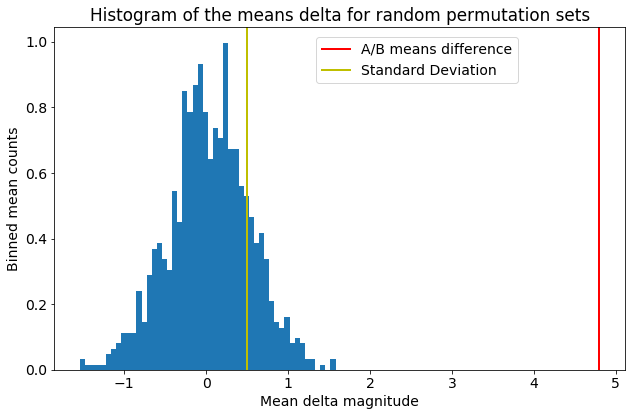

In [8]:
import matplotlib.pyplot as plt

std = np.sqrt(np.var(shuffled))

plt.rcParams["font.size"] = 14
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)

# the histogram of the data
n, bins, patches = ax.hist(shuffled, bins = 50, density=1)

ax.axvline(x = np.abs(delta), linewidth=2, color='r', label = 'A/B means difference')
ax.axvline(x = std, linewidth=2, color='y', label = 'Standard Deviation')
ax.set_xlabel('Mean delta magnitude')
ax.set_ylabel('Binned mean counts')
ax.set_title(r'Histogram of the means delta for random permutation sets')

plt.figlegend(loc = (0.5, 0.8))
# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()

plt.show()

Yellow line represents the Standard Deviation (usually referred to as 'sigma') of 'shuffled' and the red line is the difference between 'A' and 'B' means. We conclude that 'A' and 'B' are at least 8 sigma away and are extremely unlikely to represent the samples of the same kind of flower.